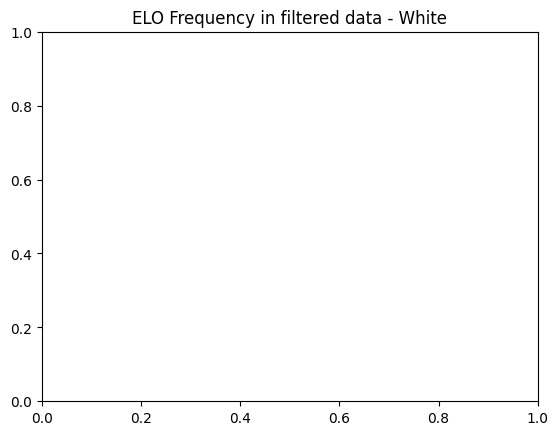

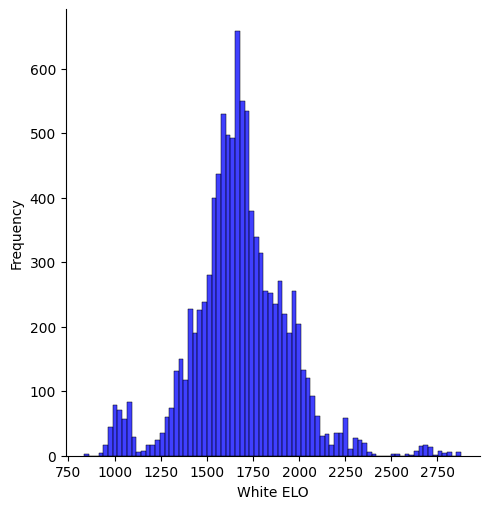

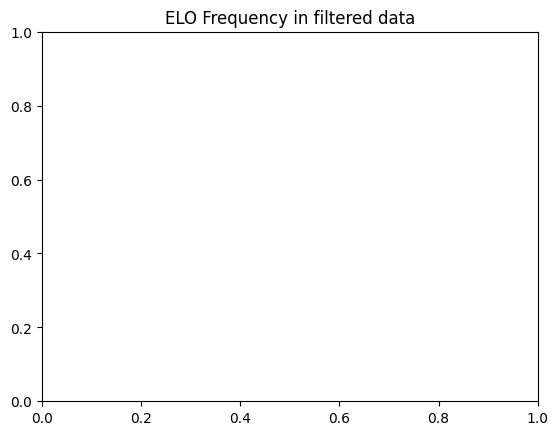

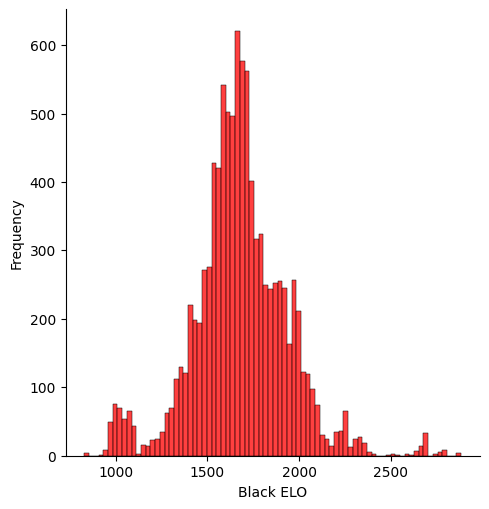

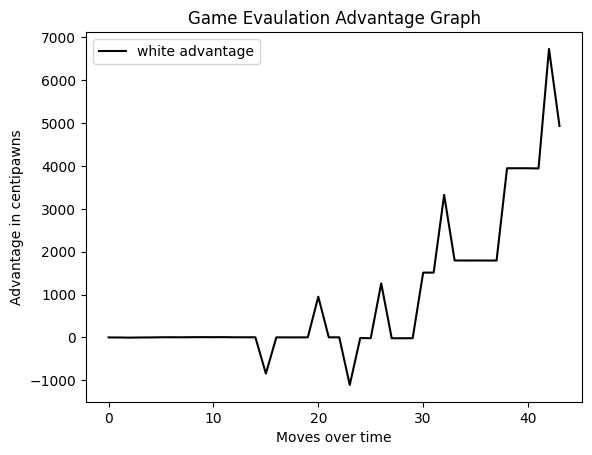

In [5]:
import numpy as np
import chess
import chess.pgn
import time
import json
import matplotlib.pyplot as plt
import seaborn as sns
import chess_utils

TRAIN_FILE = 'data/std_train_big.clean.pgn'

white_elos = []
black_elos = []

advw = []
advb = []

GAMES_LIMIT = 10000
MOVES_LIMIT = 50

train_pgn = open(TRAIN_FILE)

game = chess.pgn.read_game(train_pgn)

board = game.board()

for move in game.mainline_moves():
    wscore = chess_utils.get_board_position_value(board, chess.WHITE, 30)
    bscore =  chess_utils.get_board_position_value(board, chess.BLACK, 30)
    advw.append(wscore - bscore)
    advb.append(bscore - wscore)
    board.push(move)


for i in range(GAMES_LIMIT):
    game = chess.pgn.read_game(train_pgn)
    white_elos.append(int(game.headers['WhiteElo']))
    black_elos.append(int(game.headers['BlackElo']))


plt.title("ELO Frequency in filtered data - White")
sns.displot(white_elos, color='blue')
plt.xlabel("White ELO")
plt.ylabel("Frequency")
plt.show()


plt.title("ELO Frequency in filtered data")
sns.displot(black_elos, color = 'red')
plt.xlabel("Black ELO")
plt.ylabel("Frequency")
plt.show()


plt.title("Game Evaulation Advantage Graph")
plt.plot(advw, color='black', label='white advantage')
plt.xlabel("Moves over time")
plt.legend()

plt.ylabel("Advantage in centipawns")
plt.show()
